In [ ]:
pip install praw

In [ ]:
print(reddit.read_only)  # Should print True
print(reddit.user.me())  # Should print None if no user login
print(reddit.subreddit("fragrance").display_name)

True
None
fragrance


In [ ]:
import pandas as pd

df = pd.read_csv('/content/top 5 colognes 2014-2024.csv', encoding='latin1')

print(df.head())  # prints the first 5 rows

   Year  Rank                                    Name
0  2014     1                          Valentino Uomo
1  2014     2        Christian Dior Homme Eau for Men
2  2014     3                  Guerlain LHomme Ideal
3  2014     4             Christian Dior Homme Parfum
4  2014     5  Hermes Terre d'Hermes Eau Tres Fraiche


In [ ]:
import time
import praw
import datetime
import pandas as pd

def fetch_reviews_for_cologne(reddit, cologne_name, start_year, limit=30, subreddit='fragrance'):
    posts = []
    subreddit_instance = reddit.subreddit(subreddit)
    query = f'"{cologne_name}"'
    start_date = datetime.datetime(start_year, 1, 1)
    retries = 5
    delay = 5

    for _ in range(retries):
        try:
            for post in subreddit_instance.search(query, sort='new', limit=100):
                post_date = datetime.datetime.fromtimestamp(post.created_utc)
                if post_date >= start_date:
                    posts.append({
                        'title': post.title,
                        'selftext': post.selftext,
                        'score': post.score,
                        'date': post_date.strftime('%Y-%m-%d'),
                        'url': post.url
                    })
                    if len(posts) >= limit:
                        return posts
            break  #exit loop if successful
        except Exception as e:
            print(f"Error fetching posts for {cologne_name}: {e}")
            time.sleep(delay)
            delay *= 2  #exponential backoff
    return posts

In [ ]:
import re

def clean_and_filter_reviews(df):
    cologne_lower = df['cologne'].str.lower()
    title_lower = df['title'].str.lower()
    text_lower = df['selftext'].str.lower()

    # Filter reviews containing the cologne name and have sufficient length
    mask = (title_lower.str.contains(cologne_lower) | text_lower.str.contains(cologne_lower)) & \
           (text_lower.str.len() > 30) & \
           (~text_lower.str.match(r'^\s*http[s]?://'))

    return df[mask].reset_index(drop=True)


In [ ]:
import openai

def get_sentiment_batch(reviews, model="gpt-4o-mini", batch_size=10):
    sentiments = []
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]
        prompt = [{"role": "user", "content": f"Analyze the sentiment of this fragrance review: {review}"} for review in batch]
        try:
            response = openai.ChatCompletion.create(
                model=model,
                messages=prompt,
                max_tokens=100,
                temperature=0
            )
            sentiments.extend([r['message']['content'].strip() for r in response['choices']])
        except Exception as e:
            print(f"Error during sentiment analysis: {e}")
            sentiments.extend(['unknown'] * len(batch))  # Fallback to 'unknown' on error
    return sentiments

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_over_time(df):
    sentiment_counts = df.groupby(['year', 'sentiment']).size().unstack(fill_value=0)
    sentiment_counts = sentiment_counts.reindex(range(2014, 2025), fill_value=0)

    plt.figure(figsize=(14, 8))
    sentiment_counts.plot(kind='bar', stacked=True, colormap='tab20')
    plt.title("Distribution of Sentiment Over Time")
    plt.xlabel("Year")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=45)
    plt.legend(title="Sentiment", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
print(df.columns)

Index(['Year', 'Rank', 'Name'], dtype='object')


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Valentino Uomo...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Christian Dior Homme Eau for Men...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Guerlain LHomme Ideal...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Christian Dior Homme Parfum...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Hermes Terre d'Hermes Eau Tres Fraiche...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for A*Men Ultra Zest Thierry Mugler...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for  Noir Extreme Tom Ford...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ACQUA DI GIO Profumo Giorgio Armani...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for SAUVAGE Christian Dior...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for THE ONE FOR MEN Eau de Parfum Dolce&Gabbana...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Armani Code Profumo...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for A*Men Pure Tonka Thierry Mugler...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Valentino Uomo Intense...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for LHomme Ideal Eau de Parfum Guerlain...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Montblanc Legend Spirit...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Intense...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre d'Hermes Hermès...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Aventus Creed...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Fahrenheit Christian Dior...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de l`Homme Yves Saint Laurent...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Intense 2011 Christian Dior ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre d'Hermes Parfum Hermès...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Aventus Creed...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Parfum Christian Dior...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de l'Homme Yves Saint Laurent...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ombré Leather (2018) Tom Ford ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bleu de Chanel Parfum Chanel...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre D'Hermes Eau Intense Vetiver Hermès...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Armani Code Absolu Giorgio Armani...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Y Eau de Parfum Yves Saint Laurent ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for L'Homme Ideal Extreme Guerlain...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Le Parfum Jean Paul Gaultier...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Beau De Jour EDP Tom Ford...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ACQUA DI GIO Profondo Giorgio Armani...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Toy Boy Moschino...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sauvage Elixir Dior...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Le Parfum Jean Paul Gaultier...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de L'Homme Bleu Électrique Yves Saint Laurent...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Original Dior...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ombre Leather Parfum Tom Ford...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sauvage Elixir Dior...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Gentleman Eau de Parfum Reserve Privée Givenchy...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ombré Leather Parfum Tom Ford...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de L'Homme Bleu Électrique Yves Saint Laurent ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Emporio Armani Stronger With You Absolutely Giorgio Armani...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Elixir Jean Paul Gaultier...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Gentleman Eau de Parfum Reserve Privée Givenchy...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Beau Le Parfum Jean Paul Gaultier ...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre d'Hermes Eau Givree Hermès...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for The Most Wanted Parfum Azzaro...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Althaïr Parfums de Marly...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Elixir Jean Paul Gaultier...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for L'Homme Idéal Parfum Guerlain...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Valentino Uomo Born In Roma Intense Valentino...


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Acqua di Giò Parfum Giorgio Armani...
Error during sentiment analysis: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742

Error during sentiment analysis: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: 

<Figure size 1400x800 with 0 Axes>

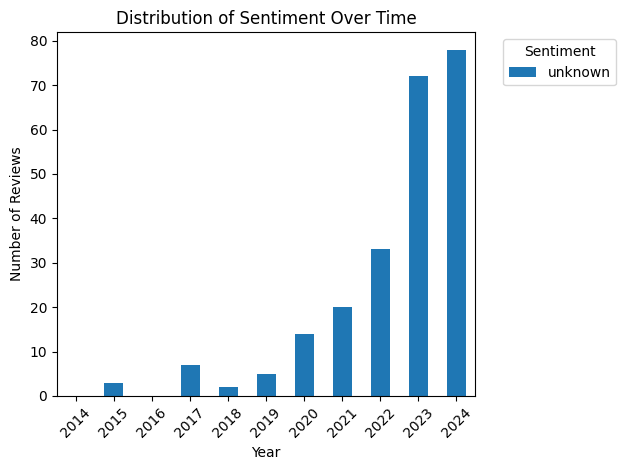

In [ ]:
# Updated clean_and_filter_reviews to avoid Series vs Series issue
def clean_and_filter_reviews(df):
    text_lower = df['selftext'].str.lower()

    # Keep reviews with enough length and not just a URL
    mask = (text_lower.str.len() > 30) & \
           (~text_lower.str.match(r'^\s*http[s]?://'))

    return df[mask].reset_index(drop=True)


all_reviews = []

# Loop over each cologne in your CSV
for cologne in df['Name']:
    print(f"Fetching posts for {cologne}...")
    posts = fetch_reviews_for_cologne(reddit, cologne, start_year=2014, limit=30)
    for p in posts:
        p['cologne'] = cologne  # add cologne name to the post dict
    all_reviews.extend(posts)
    time.sleep(2)  # avoid hitting Reddit API rate limits

# Convert all results to DataFrame
reviews_df = pd.DataFrame(all_reviews)

if not reviews_df.empty:
    # Clean & filter reviews
    reviews_df = clean_and_filter_reviews(reviews_df)

    # Extract year from 'date'
    reviews_df['year'] = pd.to_datetime(reviews_df['date']).dt.year

    # Run sentiment analysis on the text
    reviews_df['sentiment'] = get_sentiment_batch(reviews_df['selftext'].tolist())

    # Save processed reviews
    reviews_df.to_csv("reddit_cologne_reviews_with_sentiment.csv", index=False)

    # Plot sentiment over time
    plot_sentiment_over_time(reviews_df)
else:
    print("No posts found for any cologne.")


In [ ]:
from openai import OpenAI
client = OpenAI()

def get_sentiment_batch(reviews, model="gpt-4o-mini", batch_size=10):
    sentiments = []
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i + batch_size]
        # Combine reviews into one message with numbering
        reviews_text = "\n\n".join([f"Review {j+1}:\n{review}" for j, review in enumerate(batch)])
        prompt = f"Analyze the sentiment (positive, negative, or neutral) for each review below. Return one word per review, in order:\n\n{reviews_text}"
        try:
            response = client.chat.completions.create(
                model=model,
                messages=[{"role": "user", "content": prompt}],
                max_tokens=100,
                temperature=0
            )
            output = response.choices[0].message.content.strip().splitlines()
            sentiments.extend([s.strip().lower() for s in output])
        except Exception as e:
            print(f"Error during sentiment analysis: {e}")
            sentiments.extend(['unknown'] * len(batch))
    return sentiments


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Valentino Uomo...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Christian Dior Homme Eau for Men...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Guerlain LHomme Ideal...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Christian Dior Homme Parfum...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Hermes Terre d'Hermes Eau Tres Fraiche...
  Found 4 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for A*Men Ultra Zest Thierry Mugler...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for  Noir Extreme Tom Ford...
  Found 15 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ACQUA DI GIO Profumo Giorgio Armani...
  Found 3 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for SAUVAGE Christian Dior...
  Found 4 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for THE ONE FOR MEN Eau de Parfum Dolce&Gabbana...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Armani Code Profumo...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for A*Men Pure Tonka Thierry Mugler...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Valentino Uomo Intense...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for LHomme Ideal Eau de Parfum Guerlain...
  Found 4 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Montblanc Legend Spirit...
  Found 23 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Intense...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre d'Hermes Hermès...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Aventus Creed...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Fahrenheit Christian Dior...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de l`Homme Yves Saint Laurent...
  Found 5 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Intense 2011 Christian Dior ...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre d'Hermes Parfum Hermès...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Aventus Creed...
  Found 30 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Parfum Christian Dior...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de l'Homme Yves Saint Laurent...
  Found 11 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ombré Leather (2018) Tom Ford ...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Bleu de Chanel Parfum Chanel...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre D'Hermes Eau Intense Vetiver Hermès...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Armani Code Absolu Giorgio Armani...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Y Eau de Parfum Yves Saint Laurent ...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for L'Homme Ideal Extreme Guerlain...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Le Parfum Jean Paul Gaultier...
  Found 5 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Beau De Jour EDP Tom Ford...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for ACQUA DI GIO Profondo Giorgio Armani...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Toy Boy Moschino...
  Found 5 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sauvage Elixir Dior...
  Found 4 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Le Parfum Jean Paul Gaultier...
  Found 5 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de L'Homme Bleu Électrique Yves Saint Laurent...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Dior Homme Original Dior...
  Found 5 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ombre Leather Parfum Tom Ford...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Sauvage Elixir Dior...
  Found 4 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Gentleman Eau de Parfum Reserve Privée Givenchy...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Ombré Leather Parfum Tom Ford...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for La Nuit de L'Homme Bleu Électrique Yves Saint Laurent ...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Emporio Armani Stronger With You Absolutely Giorgio Armani...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Elixir Jean Paul Gaultier...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Gentleman Eau de Parfum Reserve Privée Givenchy...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Beau Le Parfum Jean Paul Gaultier ...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Terre d'Hermes Eau Givree Hermès...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for The Most Wanted Parfum Azzaro...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Althaïr Parfums de Marly...
  Found 1 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Le Male Elixir Jean Paul Gaultier...
  Found 2 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for L'Homme Idéal Parfum Guerlain...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Valentino Uomo Born In Roma Intense Valentino...
  Found 0 posts.


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Fetching posts for Acqua di Giò Parfum Giorgio Armani...
  Found 0 posts.

Total posts collected: 331
         date         cologne  \
0  2025-06-30  Valentino Uomo   
1  2025-05-30  Valentino Uomo   
2  2025-05-27  Valentino Uomo   
3  2025-04-30  Valentino Uomo   
4  2025-04-01  Valentino Uomo   
5  2025-03-12  Valentino Uomo   
6  2025-02-25  Valentino Uomo   
7  2025-02-24  Valentino Uomo   
8  2025-02-13  Valentino Uomo   
9  2025-02-03  Valentino Uomo   

                                               title  
0                                Aramani eau di nuit  
1                                    YSL - Myslf EDP  
2                         80% em are mediocre scents  
3                              Teenagers after lunch  
4        Would You Buy These Samples If You Were Me?  
5                               Unique code missing?  
6               Struggling to find fragrances I like  
7  is FragranceNet selling the old or reformulate...  
8  Performance on skin vs on paper? Wha

/tmp/ipython-input-3546528612.py:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

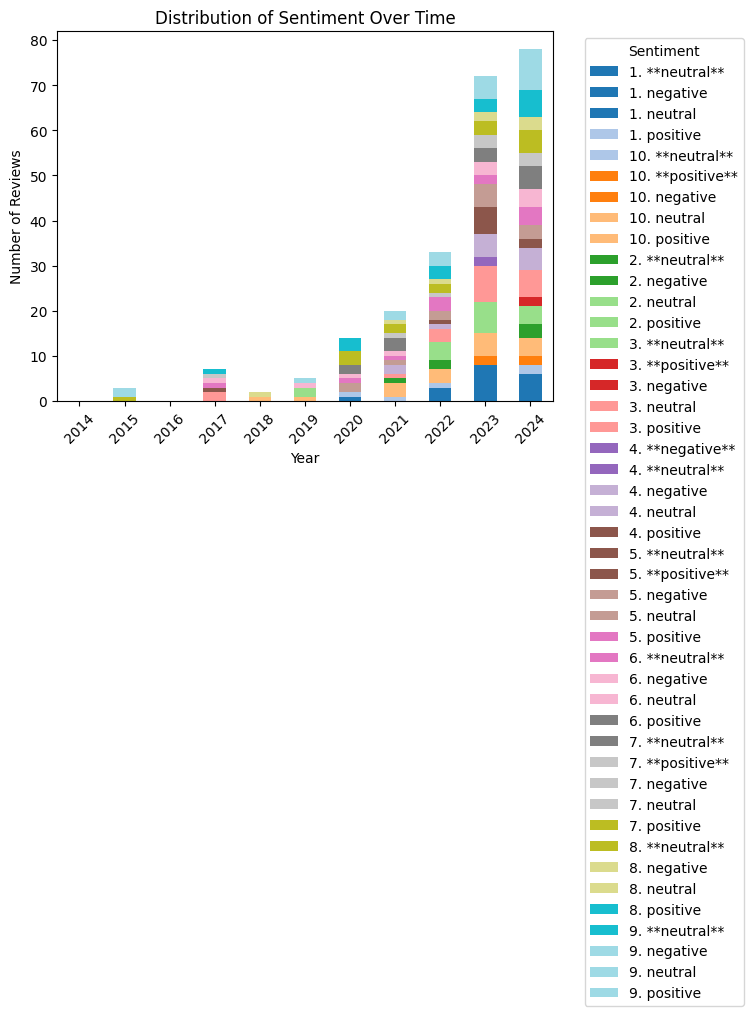

In [ ]:
all_reviews = []

# Loop over each cologne in your CSV
for cologne in df['Name']:
    print(f"Fetching posts for {cologne}...")
    posts = fetch_reviews_for_cologne(reddit, cologne, start_year=2014, limit=30)
    print(f"  Found {len(posts)} posts.")
    for p in posts:
        p['cologne'] = cologne
    all_reviews.extend(posts)
    time.sleep(2)  # avoid rate limits

# Convert to DataFrame
reviews_df = pd.DataFrame(all_reviews)

if not reviews_df.empty:
    print(f"\nTotal posts collected: {len(reviews_df)}")
    print(reviews_df[['date', 'cologne', 'title']].head(10))  # sample preview

    # Clean & filter
    reviews_df = clean_and_filter_reviews(reviews_df)
    print(f"After cleaning: {len(reviews_df)} posts remain")

    # Extract year
    reviews_df['year'] = pd.to_datetime(reviews_df['date']).dt.year

    # Run sentiment analysis
    print("\nRunning sentiment analysis...")
    reviews_df['sentiment'] = get_sentiment_batch(reviews_df['selftext'].tolist())

    print("\nSample with sentiment:")
    print(reviews_df[['year', 'cologne', 'sentiment']].head(10))

    # Save to CSV
    reviews_df.to_csv("reddit_cologne_reviews_with_sentiment.csv", index=False)
    print("\nSaved to reddit_cologne_reviews_with_sentiment.csv")

    # Plot
    plot_sentiment_over_time(reviews_df)
else:
    print("No posts found for any cologne.")


/tmp/ipython-input-2580166857.py:22: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


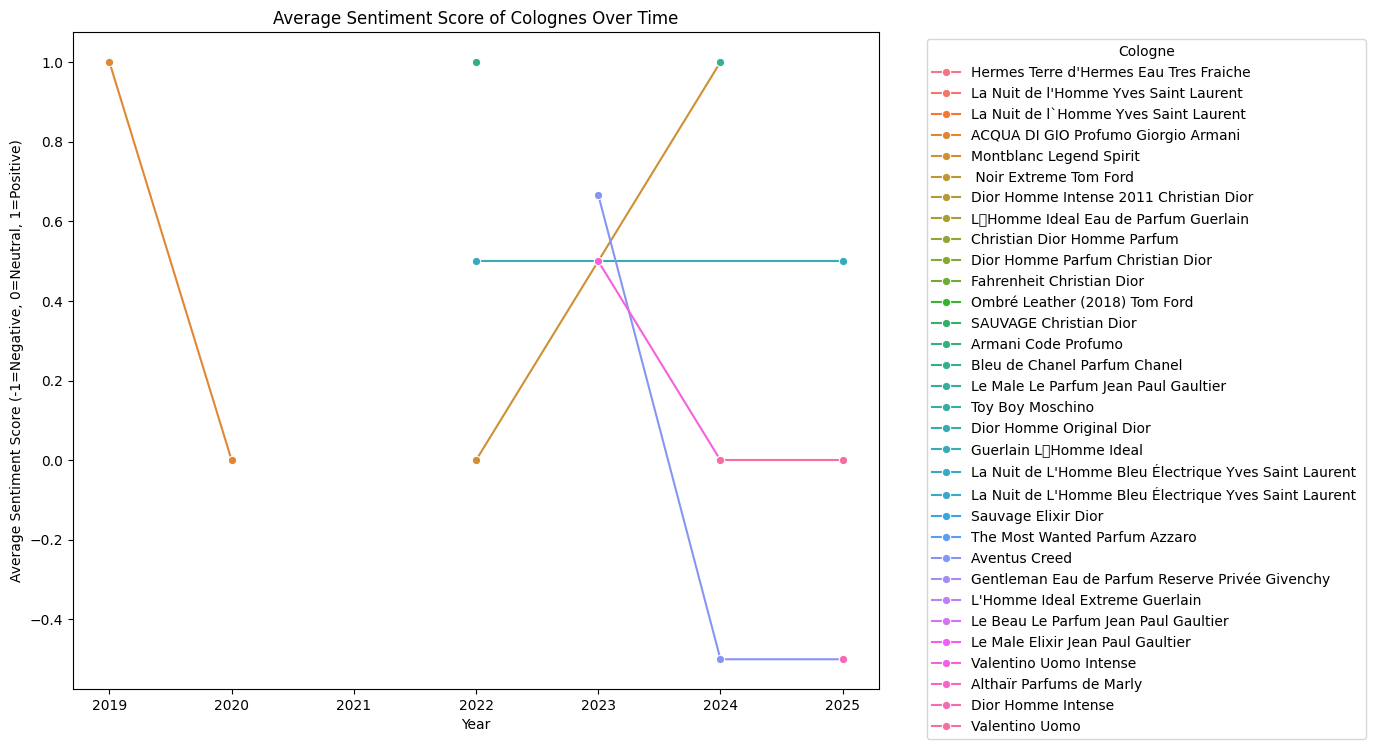

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Map sentiment labels to numeric scores for plotting
sentiment_map = {
    '1. neutral': 0,
    '2. positive': 1,
    '3. negative': -1
}
reviews_df['sentiment_score'] = reviews_df['sentiment'].map(sentiment_map)

# Aggregate average sentiment score by year and cologne
sentiment_trends = reviews_df.groupby(['year', 'cologne'])['sentiment_score'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=sentiment_trends, x='year', y='sentiment_score', hue='cologne', marker='o')

plt.title('Average Sentiment Score of Colognes Over Time')
plt.ylabel('Average Sentiment Score (-1=Negative, 0=Neutral, 1=Positive)')
plt.xlabel('Year')
plt.legend(title='Cologne', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


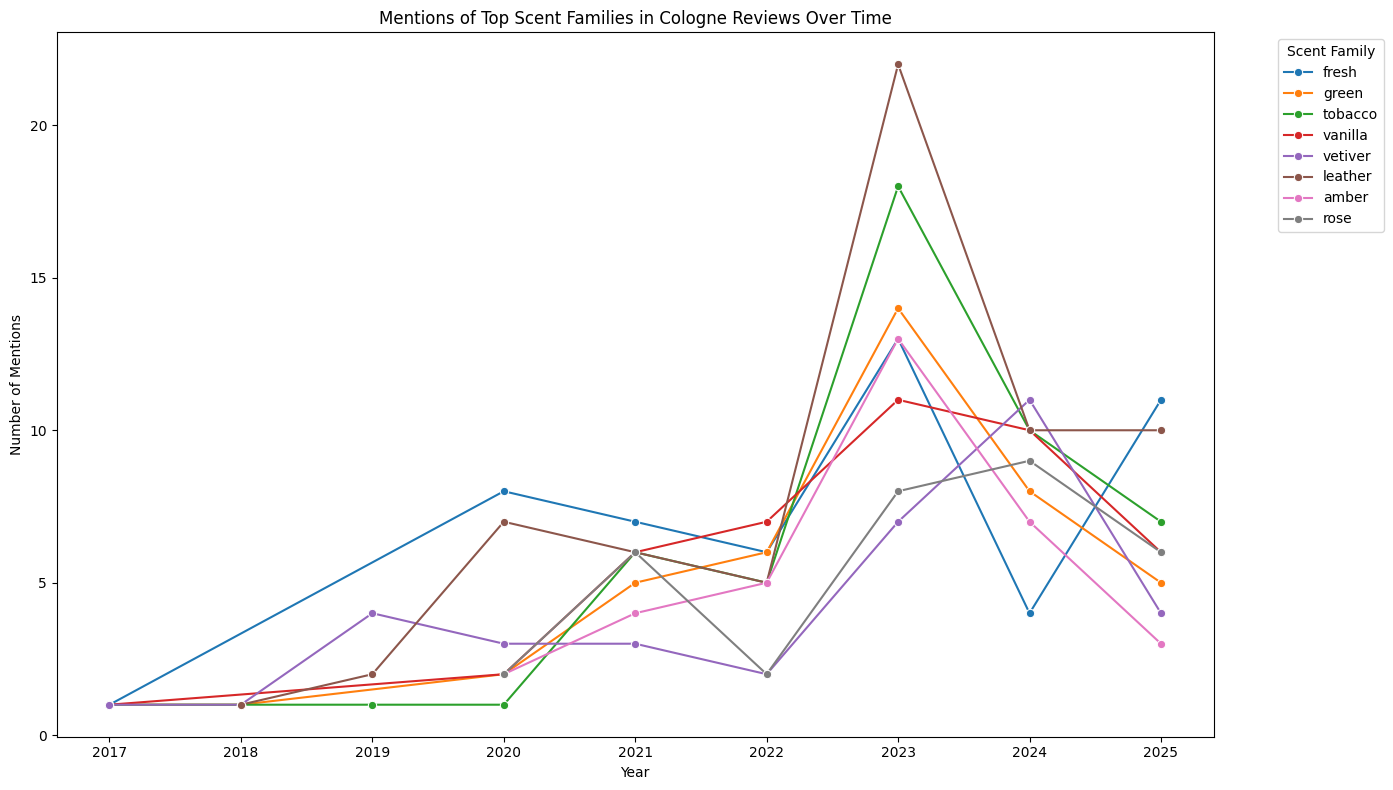

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list of scent families to look for
scent_families = [
    "citrus", "lavender", "woody", "floral", "spicy", "aromatic", "aquatic",
    "green", "fruity", "oriental", "fresh", "musk", "vanilla", "amber",
    "leather", "powdery", "aldehydic", "herbal", "gourmand", "tobacco",
    "vetiver", "patchouli", "rose", "jasmine", "sandalwood", "cedar"
]

# 1. Define a function to extract scent families mentioned in text
def extract_scent_families(text, scent_list):
    if not isinstance(text, str):
        return ["none"]
    text_lower = text.lower()
    found = [sf for sf in scent_list if sf in text_lower]
    return found if found else ["none"]

# Convert date to datetime and extract year
reviews_df['date'] = pd.to_datetime(reviews_df['date'])
reviews_df['year'] = reviews_df['date'].dt.year

# 2. Extract scent families for each post
reviews_df['scent_families'] = reviews_df['selftext'].apply(lambda x: extract_scent_families(x, scent_families))

# 3. Explode the scent_families list so each mention is its own row
reviews_exploded = reviews_df.explode('scent_families')

# 4. Aggregate mentions by year and scent family
mentions_over_time = (
    reviews_exploded
    .groupby(['year', 'scent_families'])
    .size()
    .reset_index(name='mentions')
)

#Filter out 'none' or less interesting scent families
mentions_over_time = mentions_over_time[mentions_over_time['scent_families'] != 'none']

#Focus on top 8 scent families by total mentions to keep plot clean
top_scent_families = (
    mentions_over_time.groupby('scent_families')['mentions']
    .sum()
    .nlargest(8)
    .index
)
mentions_filtered = mentions_over_time[mentions_over_time['scent_families'].isin(top_scent_families)]

# 5. Plot the trend over time
plt.figure(figsize=(14, 8))
sns.lineplot(data=mentions_filtered, x='year', y='mentions', hue='scent_families', marker='o')

plt.title('Mentions of Top Scent Families in Cologne Reviews Over Time')
plt.ylabel('Number of Mentions')
plt.xlabel('Year')
plt.legend(title='Scent Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
